In [1]:
import os
import re
import json
import spacy
import random
import convokit
import numpy as np
from tqdm import tqdm
from nltk import ngrams
from collections import defaultdict
from convokit import Corpus, download
from spacy.tokenizer import Tokenizer
import matplotlib.pyplot as plt

In [2]:
corpus_names = [
    "chromium-corpus",
    "conversations-gone-awry-cmv-corpus",
    "conversations-gone-awry-corpus",
    "deli-corpus",
    "diplomacy-corpus",
    "friends-corpus",
    "fomc-corpus",
    "fora-corpus",
    "gap-corpus",
    "iq2-corpus",
    "movie-corpus",
    "npr-2p-corpus",
    "parliament-corpus",
    "persuasionforgood-corpus",
    "reddit-coarse-discourse-corpus",
    "reddit-corpus",
    "reddit-corpus-small",
    "spolin-corpus",
    "stack-exchange-politeness-corpus",
    "supreme-corpus",
    "switchboard-corpus",
    "switchboard-processed-corpus",
    "tennis-corpus",
    "wiki-corpus",
    "wiki-politeness-annotated",
    "wikiconv-corpus",
    "wikipedia-politeness-corpus",
    "winning-args-corpus",
    "wiki-articles-for-deletion-corpus",
    "casino-corpus",
    "wiki-sampled-en-corpus",
    "wiki-sampled-zh-corpus"]
print(f'{len(corpus_names)} convokit datasets')

32 convokit datasets


In [3]:
nlp = spacy.load("en_core_web_sm", disable=["tagger", "parser", "ner"])
raw_text_file = 'datasets/convokit/convokit-all-raw-text.txt'
raw_text_vocab = 'datasets/convokit/convokit-all-raw-vocab.txt'

In [ ]:
vocab = defaultdict(int)
with open('datasets/convokit/convokit-all-raw-text.txt', 'r') as raw_text_f:
    texts = raw_text_f.readlines()
    docs = nlp.tokenizer.pipe(texts)
    count = 0
    with open(raw_text_toknenized, 'w') as raw_text_ff:
        for doc in tqdm(docs):
            trimed = []
            for token in doc:
                item = token.text.strip()
                if len(item) != 0:
                    trimed.append(item)
                    vocab[item] += 1
sorted_vocab = sorted(vocab.items(), key=lambda item: item[1], reverse=True)
print(len(sorted_vocab))
print(len(sorted_vocab) - len([_ for _ in sorted_vocab if _[1] == 1]))
print(len(sorted_vocab) - len([_ for _ in sorted_vocab if _[1] <= 2]))
print(len(sorted_vocab) - len([_ for _ in sorted_vocab if _[1] <= 3]))
print(len(sorted_vocab) - len([_ for _ in sorted_vocab if _[1] <= 4]))
print(len(sorted_vocab) - len([_ for _ in sorted_vocab if _[1] <= 5]))
print(len(sorted_vocab) - len([_ for _ in sorted_vocab if _[1] <= 20]))

In [104]:
less_freq_vocab = {_[0]:"UNK" for _ in sorted_vocab if _[1] <=30}
print(len(sorted_vocab) - len(less_freq_vocab))

103947


In [107]:
train_file = 'datasets/convokit/convokit-all-train.txt'
valid_file = 'datasets/convokit/convokit-all-valid.txt'
test_file = 'datasets/convokit/convokit-all-test.txt'
vocab_input_file = "datasets/convokit/convokit-all-vocab.json"

random.seed(17)
vocab = defaultdict(int)
with open(train_file, 'w') as train_out, open(valid_file, 'w') as valid_out, open(test_file, 'w') as test_out:
    with open('datasets/convokit/convokit-all-raw-text.txt', 'r') as infile:
        texts = infile.readlines()
        docs = nlp.tokenizer.pipe(texts)
        count = 0
        for doc in tqdm(docs):
            effective_tokens = []
            for token in doc:
                item = token.text.strip()
                if len(item) != 0:
                    if item in less_freq_vocab:
                        effective_tokens.append(less_freq_vocab[item])
                    else:
                        effective_tokens.append(item)
                        vocab[item] += 1
            trimed_sent = " ".join(effective_tokens) + '\n'
            rand = random.random()
            if rand < 0.98:  # 98 % probability for train
                train_out.write(trimed_sent)
            elif rand < 0.99:  # 1 % probability for valid
                valid_out.write(trimed_sent)
            else:  # 1 % probability for test
                test_out.write(trimed_sent)

sorted_vocab = sorted(vocab.items(), key=lambda item: item[1], reverse=True)
with open(vocab_input_file, "w") as vocab_file:
    for word,count in sorted_vocab:
        json.dump({word:count}, vocab_file)
        vocab_file.write('\n')

36909120it [28:05, 21893.92it/s]


In [36]:
# copy all raw text into one text
vocab = defaultdict(int)
with open(raw_text_file, 'w') as raw_text_f:
    for corpus_name in corpus_names:
        input_file = f"datasets/convokit/convokit-{corpus_name}.txt"
        if not os.path.exists(input_file):
                print('missing', input_file)
                continue
        print('processing: ', corpus_name)
        with open(input_file, 'r') as infile:
            for line in infile:
                for item in line.split(' '):
                        vocab[item] += 1
                raw_text_f.write(line + '\n')

sorted_vocab = sorted(vocab.items(), key=lambda item: item[1], reverse=True)
with open(raw_text_vocab, "w") as vocab_file:
    for word,count in sorted_vocab:
        json.dump({word:count}, vocab_file)
        vocab_file.write('\n')

processing:  chromium-corpus
processing:  conversations-gone-awry-cmv-corpus
processing:  conversations-gone-awry-corpus
processing:  deli-corpus
processing:  diplomacy-corpus
processing:  friends-corpus
processing:  fomc-corpus
processing:  fora-corpus
processing:  gap-corpus
processing:  iq2-corpus
processing:  movie-corpus
processing:  npr-2p-corpus
processing:  parliament-corpus
processing:  persuasionforgood-corpus
processing:  reddit-coarse-discourse-corpus
processing:  reddit-corpus
processing:  reddit-corpus-small
processing:  spolin-corpus
processing:  stack-exchange-politeness-corpus
processing:  supreme-corpus
processing:  switchboard-corpus
processing:  switchboard-processed-corpus
processing:  tennis-corpus
processing:  wiki-corpus
processing:  wiki-politeness-annotated
processing:  wikiconv-corpus
processing:  wikipedia-politeness-corpus
processing:  winning-args-corpus
processing:  wiki-articles-for-deletion-corpus
processing:  casino-corpus
processing:  wiki-sampled-en-

In [56]:
print(len(sorted_vocab))
print(len(sorted_vocab) - len([_ for _ in sorted_vocab if _[1] == 1]))
print(len(sorted_vocab) - len([_ for _ in sorted_vocab if _[1] <= 2]))
print(len(sorted_vocab) - len([_ for _ in sorted_vocab if _[1] <= 3]))
print(len(sorted_vocab) - len([_ for _ in sorted_vocab if _[1] <= 4]))
print(len(sorted_vocab) - len([_ for _ in sorted_vocab if _[1] <= 5]))
print(len(sorted_vocab) - len([_ for _ in sorted_vocab if _[1] <= 20]))

5400120
2325084
1237689
986397
781588
684273
273032


In [135]:
import kenlm
order = 3 
list_models = []
# for prec in [10,20,30,40,50,60,70,80,90,100]:
for prec in [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]:
    list_models.append(kenlm.Model(f'/Users/baojianzhou/.convokit/model_{order}_{prec}_prec.arpa'))

Loading the LM will be faster if you build a binary file.
Reading /Users/baojianzhou/.convokit/model_3_10_prec.arpa
----5---10---15---20---25---30---35---40---45---50---55---60---65---70---75---80---85---90---95--100
****************************************************************************************************
Loading the LM will be faster if you build a binary file.
Reading /Users/baojianzhou/.convokit/model_3_20_prec.arpa
----5---10---15---20---25---30---35---40---45---50---55---60---65---70---75---80---85---90---95--100
****************************************************************************************************
Loading the LM will be faster if you build a binary file.
Reading /Users/baojianzhou/.convokit/model_3_30_prec.arpa
----5---10---15---20---25---30---35---40---45---50---55---60---65---70---75---80---85---90---95--100
****************************************************************************************************
Loading the LM will be faster if you build a b

In [117]:
def calculate_perplexity(test_sents, model):
    tokens = 0
    sum_log10_prob = 0.
    for sent in test_sents:
        log10_prob = model.score(sent, bos=True, eos=True)
        tokens += len(sent.split())  + 1 # 1 means </s>
        sum_log10_prob += log10_prob
    # Calculate the perplexity: 10 ** (-log10_prob / N)
    perplexity = 10.0** (-sum_log10_prob/tokens)
    return perplexity

In [136]:
perplexity_3 = []
with open('datasets/convokit/convokit-all-test.txt', 'r') as f:
    test_sents = f.readlines()
for model in list_models:
    prep = calculate_perplexity(test_sents, model)
    print(prep)
    perplexity_3.append(prep)

442.41831186434985
162.60105489495086
127.05851816030182
108.40705505223752
99.94808224645347
89.69837431876698
85.84045806974976
69.08049082082734
65.41434890622038
64.59703405663764


In [131]:
perplexity_2 = []
with open('datasets/convokit/convokit-all-test.txt', 'r') as f:
    test_sents = f.readlines()
for model in list_models:
    prep = calculate_perplexity(test_sents, model)
    print(prep)
    perplexity_2.append(prep)

527.049204175791
221.13800965967647
189.87998207110002
177.69569311468467
175.0490856053404
168.36438360200867
163.88783162968556
140.6780406945371
134.2935780548883
133.22550438199124


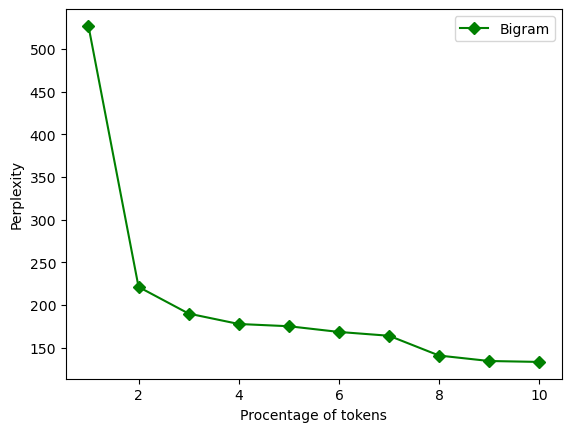

In [ ]:
plt.plot(np.arange(1, 11), perplexity, marker="D", color="green", label="Bigram")
plt.plot(np.arange(1, 11) / 10, perplexity_3, marker="D", color="blue", label="Trigram")
plt.xlabel('Procentage of tokens')
plt.ylabel('Perplexity')
plt.legend()
plt.show()

In [ ]:
perplexity = []
with open('convokit-reddit-coarse-discourse-corpus-test.txt', 'r') as f:
    test_sents = f.readlines()
model_names = ['2-gram', '3-gram', '4-gram', '5-gram']
for model, model_name in zip([gram_2_model, gram_3_model, gram_4_model, gram_5_model], model_names):
    print(model_name, calculate_perplexity(test_sents, model))
    perplexity.append(calculate_perplexity(test_sents, model))

In [60]:
less_freq_vocab = {_[0]:'UNK' for _ in sorted_vocab if _[1] <=5 }

In [69]:
raw_text_file_trim = 'datasets/convokit/convokit-all-raw-text-trim.txt'
with open(raw_text_file_trim, 'w') as raw_text_f:
    for corpus_name in corpus_names:
        input_file = f"datasets/convokit/convokit-{corpus_name}.txt"
        if not os.path.exists(input_file):
            print('missing', input_file)
            continue
        print('processing: ', corpus_name)
        with open(input_file, 'r') as infile:
            for line in tqdm(infile):
                trimed = []
                for item in line.split(' '):
                    if item in less_freq_vocab:
                        trimed.append(less_freq_vocab[item])
                    else:
                        trimed.append(item)
                raw_text_f.write(" ".join(trimed))

processing:  chromium-corpus


4504774it [00:09, 464951.11it/s]


processing:  conversations-gone-awry-cmv-corpus


258619it [00:00, 320270.02it/s]


processing:  conversations-gone-awry-corpus


118269it [00:00, 288923.28it/s]


processing:  deli-corpus


14372it [00:00, 624164.27it/s]


processing:  diplomacy-corpus


30503it [00:00, 440876.57it/s]


processing:  friends-corpus


105747it [00:00, 778924.28it/s]


processing:  fomc-corpus


465026it [00:01, 299785.85it/s]


processing:  fora-corpus


465026it [00:01, 300730.22it/s]


processing:  gap-corpus


8218it [00:00, 800743.16it/s]


processing:  iq2-corpus


124834it [00:00, 365550.16it/s]


processing:  movie-corpus


510477it [00:00, 724839.60it/s]


processing:  npr-2p-corpus


1177187it [00:03, 369452.21it/s]


processing:  parliament-corpus


1352322it [00:05, 248230.50it/s]


processing:  persuasionforgood-corpus


37116it [00:00, 549403.88it/s]


processing:  reddit-coarse-discourse-corpus


355570it [00:00, 369886.04it/s]


processing:  reddit-corpus


5825131it [00:15, 373871.30it/s]


processing:  reddit-corpus-small


5825131it [00:15, 381727.94it/s]


processing:  spolin-corpus


366651it [00:00, 619115.00it/s]


processing:  stack-exchange-politeness-corpus


13044it [00:00, 435704.17it/s]


processing:  supreme-corpus


3973399it [00:12, 326408.31it/s]


processing:  switchboard-corpus


164508it [00:00, 460488.28it/s]


processing:  switchboard-processed-corpus


107610it [00:00, 345425.39it/s]


processing:  tennis-corpus


619334it [00:01, 492314.08it/s]


processing:  wiki-corpus


619334it [00:01, 497104.94it/s]


processing:  wiki-politeness-annotated


8655it [00:00, 392769.28it/s]


processing:  wikiconv-corpus


8655it [00:00, 406468.49it/s]


processing:  wikipedia-politeness-corpus


8655it [00:00, 398481.90it/s]


processing:  winning-args-corpus


1599112it [00:04, 320699.05it/s]


processing:  wiki-articles-for-deletion-corpus


8125052it [00:23, 349238.39it/s]


processing:  casino-corpus


25613it [00:00, 568039.19it/s]


processing:  wiki-sampled-en-corpus


77576it [00:00, 318307.40it/s]


processing:  wiki-sampled-zh-corpus


13600it [00:00, 286261.82it/s]


In [ ]:
import string
print(string.punct)

In [75]:
# copy all raw text into one text
raw_text_toknenized = 'datasets/convokit/convokit-all-raw-text-tokenized.txt'
with open('datasets/convokit/convokit-all-raw-text-trim.txt', 'r') as raw_text_f:
    texts = raw_text_f.readlines()
    docs = nlp.tokenizer.pipe(texts)
    count = 0
    with open(raw_text_toknenized, 'w') as raw_text_ff:
        for doc in tqdm(docs):
            cleaned_tokens = [token.text if token.is_alpha or token.is_punct or token.is_digit else ' ' for token in doc]
            cleaned_text = re.sub(r'[^\w\s.,!?;]', ' ', ' '.join(cleaned_tokens))
            raw_text_ff.write(" ".join(cleaned_text.split()) + "\n")

35211774it [23:55, 24526.60it/s]


In [81]:
vocab = defaultdict(int)
with open('datasets/convokit/convokit-all-raw-text-tokenized.txt', 'r') as infile:
    for line in tqdm(infile):
        for item in line.strip().split(' '):
            vocab[item] += 1
sorted_vocab = sorted(vocab.items(), key=lambda item: item[1], reverse=True)
with open(raw_text_vocab_tokenized, "w") as vocab_file:
    for word, count in sorted_vocab:
        json.dump({word:count}, vocab_file)
        vocab_file.write('\n')

35211774it [01:15, 468938.26it/s]


In [86]:
less_freq_vocab = {_[0]:"UNK" for _ in sorted_vocab if _[1] <=20 }

In [87]:
print(len(sorted_vocab))
print(len(sorted_vocab) - len([_ for _ in sorted_vocab if _[1] == 1]))
print(len(sorted_vocab) - len([_ for _ in sorted_vocab if _[1] <= 2]))
print(len(sorted_vocab) - len([_ for _ in sorted_vocab if _[1] <= 3]))
print(len(sorted_vocab) - len([_ for _ in sorted_vocab if _[1] <= 4]))
print(len(sorted_vocab) - len([_ for _ in sorted_vocab if _[1] <= 5]))
print(len(sorted_vocab) - len([_ for _ in sorted_vocab if _[1] <= 20]))

223611
214033
205764
203813
201653
200465
99368


In [89]:
train_file = 'datasets/convokit/convokit-all-train.txt'
valid_file = 'datasets/convokit/convokit-all-valid.txt'
test_file = 'datasets/convokit/convokit-all-test.txt'

random.seed(17)
if not os.path.exists('datasets/convokit/convokit-all-raw-text-tokenized.txt'):
    print('missing', 'datasets/convokit/convokit-all-raw-text-tokenized.txt')
vocab = defaultdict(int)
count = 0
with open(train_file, 'w') as train_out, open(valid_file, 'w') as valid_out, open(test_file, 'w') as test_out:
    with open('datasets/convokit/convokit-all-raw-text-tokenized.txt', 'r') as infile:
        for ind, line in tqdm(enumerate(infile)):
            effective_tokens = []
            for item in line.strip().split(' '):
                if item in less_freq_vocab:
                    effective_tokens.append(less_freq_vocab[item])
                else:
                    effective_tokens.append(item)
            print(effective_tokens)
            print(" ".join(effective_tokens) + '\n')
            count += 1
            if count == 50:
                break
            rand = random.random()  # Generate a random number between 0 and 1
            if rand < 0.98:  # 98% probability for train
                train_out.write(" ".join(effective_tokens) + '\n')
                for item in line.split():
                    vocab[item] += 1
            elif rand < 0.99:  # 1% probability for valid
                valid_out.write(" ".join(effective_tokens) + '\n')
            else:  # 1% probability for test
                test_out.write(" ".join(effective_tokens) + '\n')
            if ind % 2000 == 0:
                print(ind, line)
sorted_vocab = sorted(vocab.items(), key=lambda item: item[1], reverse=True)
with open("datasets/convokit/convokit-all-vocab.json", "w") as vocab_file:
    for word,count in sorted_vocab:
        json.dump({word:count}, vocab_file)
        vocab_file.write('\n')

49it [00:00, 16355.32it/s]

['can', 'you', 'stick', 'this', 'flag', 'up', 'in', 'the', 'group', 'of', 'UNK', 'above', '?']
can you stick this flag up in the group of UNK above ?

0 can you stick this flag up in the group of UNK above ?

['careful', ',', 'your', 'files', 'are', 'out', 'of', 'sync', '.']
careful , your files are out of sync .

['run', 'scons', 'twice', 'again', '.']
run scons twice again .

['i', 'would', 'love', 'to', 'see', 'this', 'function', 'as', 'minimal', 'as', 'possible', '.']
i would love to see this function as minimal as possible .

['can', 'UNK', 'takes', 'UNK', 'as', 'an', 'argument', 'to', 'UNK', 'to', 'make', 'calling', 'it', 'even', 'simpler', '.']
can UNK takes UNK as an argument to UNK to make calling it even simpler .

['and', 'can', 'it', 'call', 'UNK', 'directly', '?']
and can it call UNK directly ?

['that', 'way', ',', 'we', 'can', 'change', 'UNK', 'without', 'updating', 'gcl', ',', 'which', 'might', 'live', 'on', 'a', 'different', 'repository', '.']
that way , we can change 

In [40]:
# copy all raw text into one text
raw_text_toknenized = 'datasets/convokit/convokit-all-raw-text-tokenized.txt'
raw_text_vocab_tokenized = 'datasets/convokit/convokit-all-raw-vocab.txt'
vocab = defaultdict(int)
with open(raw_text_toknenized, 'w') as raw_text_f:
    texts = raw_text_f.readlines()
    docs = nlp.tokenizer.pipe(texts)
    with open(raw_text_file, 'r') as infile:
        for line in tqdm(infile):
            tokens = clean_text(line)
            for item in tokens:
                vocab[item] += 1
            raw_text_f.write(" ".join(tokens) + '\n')
sorted_vocab = sorted(vocab.items(), key=lambda item: item[1], reverse=True)
with open(raw_text_vocab_tokenized, "w") as vocab_file:
    for word,count in sorted_vocab:
        json.dump({word:count}, vocab_file)
        vocab_file.write('\n')

719768it [07:05, 1692.58it/s]


KeyboardInterrupt: 

In [30]:
less_freq_vocab = {_:'UNK' for _ in sorted_vocab if _[1] <=5 }

In [ ]:
print(len(sorted_vocab) - len([_ for _ in sorted_vocab if _[1] <= 5]))